<a href="https://colab.research.google.com/github/Gweneal3/Machine_Learning_YT/blob/master/House%20Price%20Prediction/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn==1.1.3

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import sklearn.datasets;
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split;
from xgboost import XGBRegressor;
from sklearn import metrics;

Importing the Boston/California House Price Dataset

In [ ]:
# Boston
boston_house_price_dataset = sklearn.datasets.load_boston();


# California
# california_house_price_dataset = fetch_california_housing();

In [ ]:
print(boston_house_price_dataset);

In [ ]:
# print(california_house_price_dataset);

In [ ]:
# Loading dataset to Pandas DataFrame
boston_house_price_dataframe = pd.DataFrame(boston_house_price_dataset.data, columns=boston_house_price_dataset.feature_names);
# california_house_price_dataframe = pd.DataFrame(california_house_price_dataset.data, columns=california_house_price_dataset.feature_names);

In [ ]:
# add the target(price) column to the DataFrame
boston_house_price_dataframe['PRICE'] = boston_house_price_dataset.target;
# california_house_price_dataframe['PRICE'] = california_house_price_dataset.target;

In [ ]:
print(boston_house_price_dataframe.head());

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [ ]:
# print(california_house_price_dataframe.head());

In [ ]:
print(boston_house_price_dataframe.shape);

(506, 14)


In [ ]:
# Check for missing value
boston_house_price_dataframe.isnull().sum();

In [ ]:
print(boston_house_price_dataframe.describe());

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Understanding the correlation between various features in the dataset

1. Positive Correlation?
2. Negative Correlation?

In [ ]:
correlation = boston_house_price_dataframe.corr();

In [ ]:
print(correlation);

Construct heatmap to understand correlation

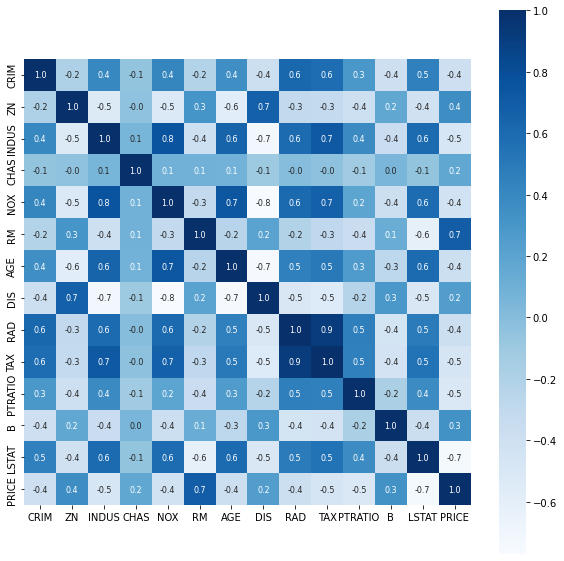

In [ ]:
plt.figure(figsize=(10,10));
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues');

In [ ]:
X = boston_house_price_dataframe.drop(['PRICE'], axis=1);
Y = boston_house_price_dataframe['PRICE'];

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1);

In [ ]:
print(X.shape, X_train.shape, X_test.shape);

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor - Type of Decision Tree

In [ ]:
model = XGBRegressor();

In [ ]:
model.fit(X_train,Y_train);

Evaluation

In [ ]:
training_data_prediction = model.predict(X_train);
print(training_data_prediction);

[25.245571  23.32921    7.210682  21.154896  11.702352  26.999006
 29.584614  26.544731  43.50524   23.625568  11.002917  33.40945
 36.007214  36.40028   19.037712  20.18499   34.905746  49.99532
 19.321676  14.898901  26.617535  19.894657  24.802687  21.180086
 23.923895  20.586973  23.074522  27.950964  19.987543  23.094906
 25.010534   9.705043  23.892748  36.09172   13.418543  12.731809
 39.79168   10.393237  20.598629  17.775103  19.482315  23.710855
 28.513987  24.29506   23.771362  19.072584  28.377209  20.49642
 33.825535  14.507262  20.39619   16.009405  13.304443  30.793392
 27.49651   24.428276  24.389343  25.122246  43.8164    21.898586
 26.22088   14.255268  20.789656  20.105751  23.099632  13.068087
 16.195873  24.834087  20.208426  22.484184  14.791592  28.696594
 20.114979  23.412987  31.992868  19.124737  49.992138  20.895212
 21.69236   21.999992  17.206669  30.303902  12.287807  21.39682
 20.501791  35.200222  19.602581  22.003605  21.689674  14.086667
 21.088537  15

In [ ]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction);
print(score_1); # <5

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction);
print(score_2); # <5

0.9999952977725205
0.01375658535721277


Visualising Actual and Predicted

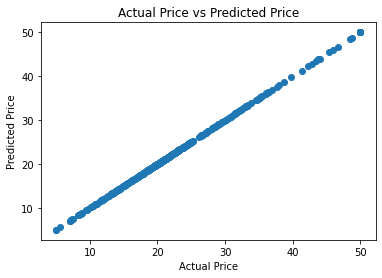

In [ ]:
plt.scatter(Y_train, training_data_prediction);
plt.xlabel("Actual Price");
plt.ylabel("Predicted Price");
plt.title("Actual Price vs Predicted Price");

In [ ]:
testing_data_prediction = model.predict(X_test);
print(testing_data_prediction);

[30.359884 27.026636 19.17616  21.448114 20.703493 20.424747 27.9036
 17.878405 21.678137 23.36513  25.411674 33.19199  21.495481 19.939993
 19.990822 28.529932 13.219593 44.483154 25.460302 11.562899 19.486588
 17.153116 24.325785 23.509218 27.791344  8.616411 14.683976 19.01615
 45.651524 12.10203  22.976582 17.523937 48.34446  16.573458 24.024517
 21.818398 14.679352 35.878193 16.073364 20.764208 25.262817 22.376215
 24.78839  14.799538 16.877083 11.262062 46.995094 11.280138 21.217411
 18.637756 23.77302  20.691387 25.980684 20.501291  8.173699 22.731295
 11.759897 24.526464 18.271172 38.32712  12.570583 25.870787 12.011916
 13.295293 17.679295 35.901722 37.55958  23.164257 20.201231 20.955679
 24.68425   7.049963 18.19561  19.824377 19.77468  20.867382 40.98662
 24.473787 27.369884 31.096327 16.441713 19.326612 36.752098  9.891363
 20.98247  25.28127  14.024525 26.155094 21.51227  16.4159   23.28247
 45.429245 15.133404 20.947332 14.996857 20.791437 24.775454 23.958286
 45.176277 

In [ ]:
# R Squared Error
score_1 = metrics.r2_score(Y_test, testing_data_prediction);
print(score_1); # <5

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction);
print(score_2); # <5

0.9085331557145866
2.344013180452235


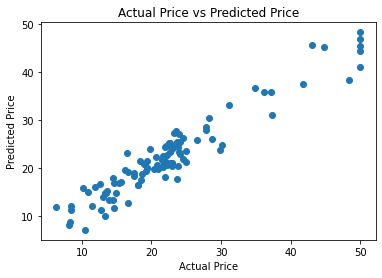

In [ ]:
plt.scatter(Y_test, testing_data_prediction);
plt.xlabel("Actual Price");
plt.ylabel("Predicted Price");
plt.title("Actual Price vs Predicted Price");